In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

In [12]:
db=mysql.connector.connect( host='localhost',
    user='root',
    password='12345',
    database='ecommerce')
cur=db.cursor()

# Basic Queries
## 1. List all unique cities where customers are located.

In [13]:
query=""" select distinct customer_city from customers"""
cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [15]:
query = """ select distinct customer_city from customers """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


## 2. Count the number of orders placed in 2017.

In [18]:
query=""" select count(order_id) from orders where year(order_purchase_timestamp)=2017 """
cur.execute(query)
data=cur.fetchall()
data

[(180404,)]

## 3. Find the total sales per category.

In [19]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""
cur.execute(query)
data = cur.fetchall()
data

[('SPORT LEISURE', 5568510.24),
 ('HOME APPLIANCES', 382129.08),
 ('FURNITURE OFFICE', 2587305.95),
 ('COOL STUFF', 3118792.0),
 ('BED TABLE BATH', 6850214.68),
 ('CASA CONSTRUCAO', 546581.16),
 ('AUTOMOTIVE', 3409177.32),
 ('WATCHES PRESENT', 5716866.71),
 ('CLIMATIZATION', 364682.64),
 ('PERFUMERY', 2026954.64),
 ('FASHION BAGS AND ACCESSORIES', 872633.12),
 ('MARKET PLACE', 181343.68),
 ('HOUSEWARES', 4379032.52),
 ('BAGS ACCESSORIES', 748605.16),
 ('TELEPHONY', 1947528.2),
 ('COMPUTER ACCESSORIES', 6341321.79),
 ('ELECTRONICS', 1039428.4),
 ('HEALTH BEAUTY', 6629492.48),
 ('ELECTRICES 2', 498253.84),
 ('BABIES', 2159382.64),
 ('FURNITURE DECORATION', 5720705.57),
 ('TOYS', 2476150.76),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 965902.52),
 ('STATIONARY STORE', 1269760.28),
 ('PC GAMER', 8697.72),
 ('CONSTRUCTION TOOLS TOOLS', 84276.28),
 ('CONSTRUCTION TOOLS GARDEN', 169577.64),
 ('PCS', 1116486.2),
 ('GENERAL INTEREST BOOKS', 258779.04),
 ('ROOM FURNITURE', 544555.08),
 ('PET SHOP', 12

In [20]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head()

,0,1
0,SPORT LEISURE,5568510.24
1,HOME APPLIANCES,382129.08
2,FURNITURE OFFICE,2587305.95
3,COOL STUFF,3118792.00
4,BED TABLE BATH,6850214.68


In [23]:
df=pd.DataFrame(data,columns=['category','sales'])
df.head()                

,category,sales
0,SPORT LEISURE,5568510.24
1,HOME APPLIANCES,382129.08
2,FURNITURE OFFICE,2587305.95
3,COOL STUFF,3118792.00
4,BED TABLE BATH,6850214.68


## 4. Calculate the percentage of orders that were paid in installments.

In [25]:
query = """ select ((sum(case when payment_installments >= 1 then 1
else 0 end))/count(*))*100 from payments
"""

cur.execute(query)

data = cur.fetchall()
data

[(Decimal('99.9981'),)]

## 5. Count the number of customers from each state. 

In [29]:
query = """ select customer_state ,count(customer_id)
from customers group by customer_state """

cur.execute(query)

data = cur.fetchall()
data

[('SP', 166984),
 ('SC', 14548),
 ('MG', 46540),
 ('PR', 20180),
 ('RJ', 51408),
 ('RS', 21864),
 ('PA', 3900),
 ('GO', 8080),
 ('ES', 8132),
 ('BA', 13520),
 ('MA', 2988),
 ('MS', 2860),
 ('CE', 5344),
 ('DF', 8560),
 ('RN', 1940),
 ('PE', 6608),
 ('MT', 3628),
 ('AM', 592),
 ('AP', 272),
 ('AL', 1652),
 ('RO', 1012),
 ('PB', 2144),
 ('TO', 1120),
 ('PI', 1980),
 ('AC', 324),
 ('SE', 1400),
 ('RR', 184)]

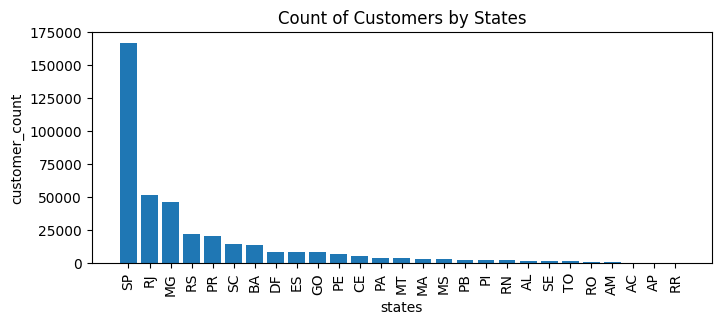

In [30]:
df = pd.DataFrame(data, columns = ["state", "customer_count" ])
df = df.sort_values(by = "customer_count", ascending= False)

plt.figure(figsize = (8,3))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")
plt.show()

# Intermediate Queries
## 1. Calculate the number of orders per month in 2018.


In [33]:
query=""" select count(order_id),month(order_purchase_timestamp) as month from orders 
where year(order_purchase_timestamp)=2018 
group by month """
cur.execute(query)

data = cur.fetchall()
data

[(25168, 7),
 (26048, 8),
 (26912, 2),
 (24668, 6),
 (28844, 3),
 (29076, 1),
 (27492, 5),
 (27756, 4),
 (64, 9),
 (16, 10)]

In [35]:
query=""" select count(order_id),monthname(order_purchase_timestamp) as months from orders 
where year(order_purchase_timestamp)=2018 
group by months """
cur.execute(query)

data = cur.fetchall()
data

[(25168, 'July'),
 (26048, 'August'),
 (26912, 'February'),
 (24668, 'June'),
 (28844, 'March'),
 (29076, 'January'),
 (27492, 'May'),
 (27756, 'April'),
 (64, 'September'),
 (16, 'October')]

In [43]:
query=""" select monthname(order_purchase_timestamp) as months,count(order_id) from orders 
where year(order_purchase_timestamp)=2018 
group by months
"""
cur.execute(query)

data = cur.fetchall()
data

[('July', 25168),
 ('August', 26048),
 ('February', 26912),
 ('June', 24668),
 ('March', 28844),
 ('January', 29076),
 ('May', 27492),
 ('April', 27756),
 ('September', 64),
 ('October', 16)]

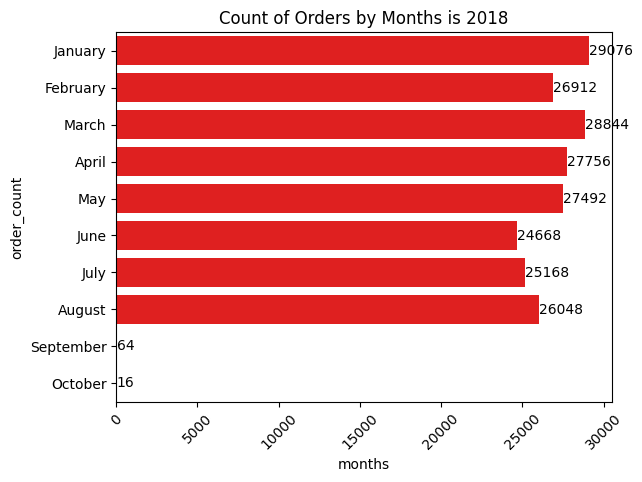

In [44]:
df = pd.DataFrame(data, columns = ["order_count","months"])
ax = sns.barplot(x = df["months"],y =  df["order_count"], data = df, order = o, color = "red")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")
plt.show()

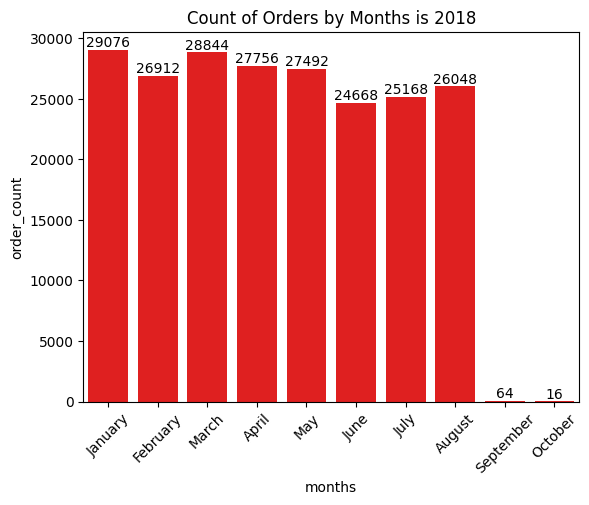

In [45]:
df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ["January", "February","March","April","May","June","July","August","September","October"]

ax = sns.barplot(x = df["months"],y =  df["order_count"], data = df, order = o, color = "red")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")

plt.show()

## 2. Find the average number of products per order, grouped by customer city.

In [46]:
query = """with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city", "average products/order"])
df.head(10)

,customer city,average products/order
0,padre carvalho,28.00
1,celso ramos,26.00
2,datas,24.00
3,candido godoi,24.00
4,matias olimpio,20.00
5,cidelandia,16.00
6,curralinho,16.00
7,picarra,16.00
8,morro de sao paulo,16.00
9,teixeira soares,16.00


## 3. Calculate the percentage of total revenue contributed by each product category.

In [56]:
query = """ select upper(products.product_category) category, 
ROUND(sum(payments.payment_value)*100/(select sum(payment_value) from payments),2) sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
ORDER BY sales DESC
"""
cur.execute(query)
data = cur.fetchall()
data

[('BED TABLE BATH', 42.79),
 ('HEALTH BEAUTY', 41.41),
 ('COMPUTER ACCESSORIES', 39.61),
 ('FURNITURE DECORATION', 35.73),
 ('WATCHES PRESENT', 35.71),
 ('SPORT LEISURE', 34.78),
 ('HOUSEWARES', 27.35),
 ('AUTOMOTIVE', 21.3),
 ('GARDEN TOOLS', 20.95),
 ('COOL STUFF', 19.48),
 ('FURNITURE OFFICE', 16.16),
 ('TOYS', 15.47),
 ('BABIES', 13.49),
 ('PERFUMERY', 12.66),
 ('TELEPHONY', 12.17),
 ('STATIONARY STORE', 7.93),
 ('PET SHOP', 7.78),
 ('PCS', 6.97),
 ('ELECTRONICS', 6.49),
 (None, 6.32),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 6.03),
 ('MUSICAL INSTRUMENTS', 5.82),
 ('ELECTROSTILE', 5.64),
 ('FASHION BAGS AND ACCESSORIES', 5.45),
 ('FIXED TELEPHONY', 5.17),
 ('GAMES CONSOLES', 4.88),
 ('BAGS ACCESSORIES', 4.68),
 ('CASA CONSTRUCAO', 3.41),
 ('ROOM FURNITURE', 3.4),
 ('ELECTRICES 2', 3.11),
 ('AGRO INDUSTRIA E COMERCIO', 2.97),
 ('HOME APPLIANCES', 2.39),
 ('CLIMATIZATION', 2.28),
 ('HOUSE COMFORT', 2.11),
 ('FURNITURE KITCHEN SERVICE AREA DINNER AND GARDEN', 1.87),
 ('CONSTRUCTION TOOLS

In [57]:
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df.head()

,Category,percentage distribution
0,BED TABLE BATH,42.79
1,HEALTH BEAUTY,41.41
2,COMPUTER ACCESSORIES,39.61
3,FURNITURE DECORATION,35.73
4,WATCHES PRESENT,35.71


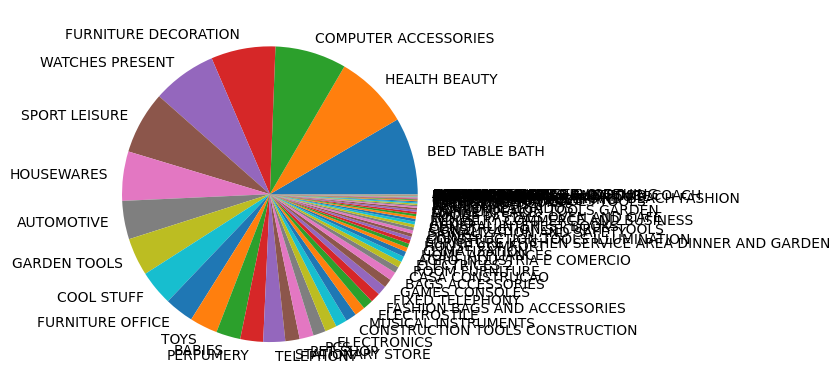

,Category,percentage distribution
0,BED TABLE BATH,42.79
1,HEALTH BEAUTY,41.41
2,COMPUTER ACCESSORIES,39.61
3,FURNITURE DECORATION,35.73
4,WATCHES PRESENT,35.71


In [61]:
query = """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
plt.pie(df["percentage distribution"],labels= df["Category"])
plt.show()
df.head()

## 4. Identify the correlation between product price and the number of times a product has been purchased.

In [69]:

query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])
print(df.head())
arr1 = df["order_count"]
arr2 = df["price"]

a=np.corrcoef([arr1,arr2])
print(a)
print("the correlation is", a[0][-1])

               Category  order_count   price
0         sport leisure        34564  114.34
1             perfumery        13676  116.74
2  Furniture Decoration        33336   87.56
3                  toys        16468  117.55
4            Cool Stuff        15184  167.36
[[ 1.         -0.10631514]
 [-0.10631514  1.        ]]
the correlation is -0.10631514167157564


## 5. Calculate the total revenue generated by each seller, and rank them by revenue.

In [84]:
query = """select round(sum(o.price),2) as revenue,s.seller_id, dense_rank() over(order by sum(o.price) desc) as revenue_rank
from order_items o
join sellers s
on o.seller_id=s.seller_id 
group by s.seller_id
 """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["revenue", "seller","revenue_rank"])
df.head()

,revenue,seller,revenue_rank
0,917890.51,4869f7a5dfa277a7dca6462dcf3b52b2,1
1,891104.20,53243585a1d6dc2643021fd1853d8905,2
2,801891.69,4a3ca9315b744ce9f8e9374361493884,3
3,776168.12,fa1c13f2614d7b5c4749cbc52fecda94,4
4,751695.57,7c67e1448b00f6e969d365cea6b010ab,5


In [90]:
query = """ 
select order_items.seller_id, sum(payments.payment_value) as revenue,dense_rank() over(order by sum(payments.payment_value) desc) as rn
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df.head() 

,seller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.907302,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.039840,2
2,4a3ca9315b744ce9f8e9374361493884,301245.269765,3
3,1f50f920176fa81dab994f9023523100,290253.420128,4
4,53243585a1d6dc2643021fd1853d8905,284903.080498,5


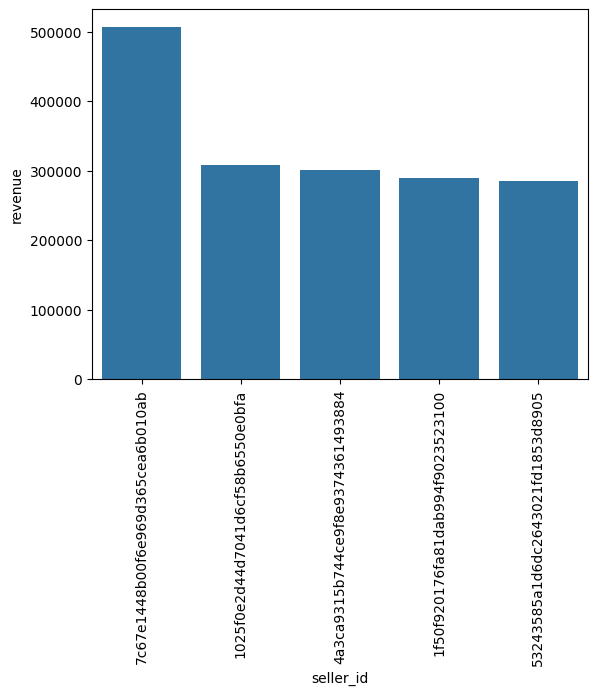

In [92]:
df=df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

# Advanced Queries
## 1. Calculate the moving average of order values for each customer over their order history.

In [113]:
query = """ 
select o.customer_id,o.order_purchase_timestamp, p.payment_value,
avg(p.payment_value) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row)
from orders o
join payments p
on o.order_id=p.order_id """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer_id", "time","payment","moving_avg"])
df.head(10)

,customer_id,time,payment,moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
5,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
6,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
7,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
8,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
9,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998


In [107]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head(10)

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
5,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
6,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
7,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
8,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
9,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998


## 2. Calculate the cumulative sales per month for each year.

In [115]:
query = """select months,years,payment,sum(payment) over(order by years,months)
from(
select  month(o.order_purchase_timestamp) as months,
year(o.order_purchase_timestamp) as years,round(sum(p.payment_value),2) as payment
from ecommerce.orders o
join ecommerce.payments p
on o.order_id=p.order_id
group by years,months
order by years,months) as t;"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head(10)

,0,1,2,3
0,9,2016,1008.96,1008.96
1,10,2016,236361.92,237370.88
2,12,2016,78.48,237449.36
3,1,2017,553952.16,791401.52
4,2,2017,1167632.04,1959033.56
5,3,2017,1799454.40,3758487.96
6,4,2017,1671152.12,5429640.08
7,5,2017,2371675.28,7801315.36
8,6,2017,2045105.52,9846420.88
9,7,2017,2369531.68,12215952.56


## 3. Calculate the year-over-year growth rate of total sales.

In [121]:
query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years,payment, (payment-lag(payment) over(order by years))*100/lag(payment) over(order by years) as yoy
from a """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns=["year","payment","yoy%_growth"])
df

,year,payment,yoy%_growth
0,2016,237449.36,NaN
1,2017,28998986.91,12112.703757
2,2018,34799052.21,20.000924


## 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [122]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data


[(None,)]

In [ ]:
# since we are getting null value here which means we don't have a repeated customer who buys from us in interval of g 6 months.

## 5. Identify the top 3 customers who spent the most money in each year.

In [131]:
query = """
SELECT customer_id, years, spent
FROM (
    SELECT o.customer_id,
           YEAR(o.order_purchase_timestamp) AS years,
           SUM(p.payment_value) AS spent,
           ROW_NUMBER() OVER (PARTITION BY YEAR(o.order_purchase_timestamp) 
                              ORDER BY SUM(p.payment_value) DESC) AS rn
    FROM orders o
    JOIN payments p
      ON o.order_id = p.order_id
    GROUP BY o.customer_id, years
) t
WHERE rn <= 3
ORDER BY years DESC, spent DESC;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2
0,ec5b2ba62e574342386871631fafd3fc,2018,29099.519531
1,f48d464a0baaea338cb25f816991ab1f,2018,27688.839844
2,e0a2412720e9ea4f26c1ac985f6a7358,2018,19237.759766
3,1617b1357756262bfa56ab541c47bc16,2017,54656.320312
4,c6e2731c5b391845f6800c97401a43a9,2017,27717.240234
5,3fd6777bbce08a352fddd04e4a7cc8f6,2017,26906.640625
6,a9dc96b027d1252bbac0a9b72d837fc6,2016,5694.200195
7,1d34ed25963d5aae4cf3d7f3a4cda173,2016,5602.959961
8,4a06381959b6670756de02e07b83815f,2016,4911.120117


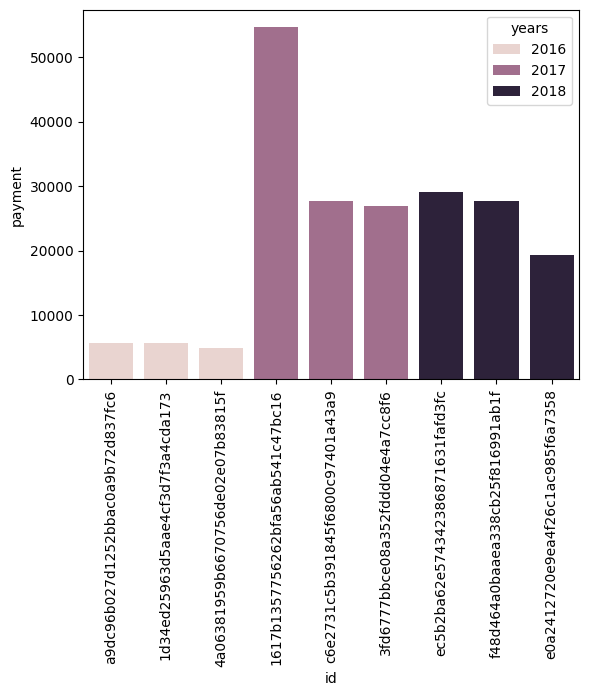

In [132]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()